## Initialization

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import os, sys, pandas as pd

sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')
sys.path.append('../../../')

import hts_fitting as hts, hts_showcase as sc, seaborn as sns, hts_fitfunctions as ff
from uncertainties import ufloat
from scipy import constants, optimize
from scipy.interpolate import interp1d
import default_style

def linear_norm(x, a):
    return a*x+1
    
savedir = '/Users/alexisdevitre/Documents/GitHub/2025-devitre-PhD/chapter 6/figures/raw/'

## Plot

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_93378/2846569600.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Voltage [$\mu$V]')
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:161: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(fpath, usecols=cols, skiprows=2, delim_whitespace=True, names=names)
/Users/alexisdevitre/Documents/code/hts-irradiation/hts_fitting.py:161: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(fpath, usecols=cols, skiprows=2, delim_whitespace=True, names=names)


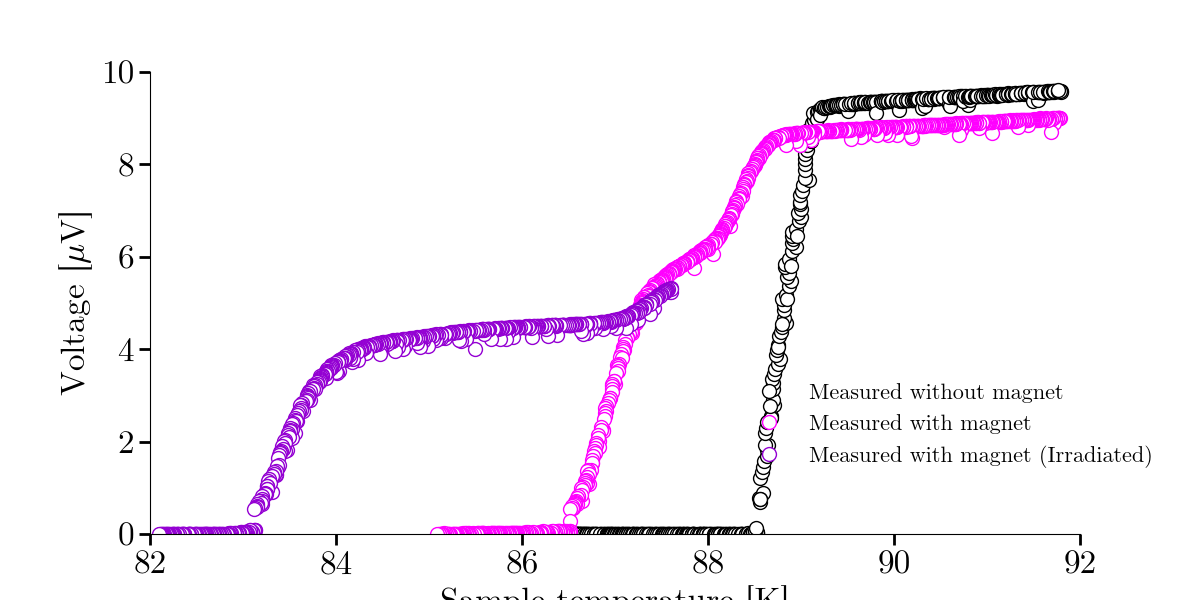

In [5]:
path = '../tapes/ext_ffj51/Tc/infield/'

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Voltage [$\mu$V]')
ax.set_xlabel('Sample temperature [K]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 10)
ax.set_xlim(82, 92)

fnames = [
    'Tc_2025-03-06_19-39-41549956_ffj51-step00-nomagnet-up.txt',
    'Tc_2025-03-26_20-45-07747039_ffj51-step00-magnet-dn.txt',
    'Tc_2025-03-28_12-49-13960962_ffj51-step03-magnet-anneal300k-720min-dn.txt'
]

for i, f in enumerate(fnames):
    data = hts.readTV(path+f)
    cut = data.sampleT < 91.8
    if i == 0:
        c, m, l = 'k', 'o', 'Measured without magnet'
    elif i == 1:
        c, m, l = 'magenta', 'o', 'Measured with magnet'
    else:
        c, m, l = 'darkviolet', 'o', 'Measured with magnet (Irradiated)'
        
    ax.plot(data.sampleT[cut], 1e6*data.voltage[cut], linestyle='None', marker=m, label=l, color=c, mfc='white')

ax.legend(loc='lower right', frameon=False, bbox_to_anchor = (1.1, 0.1))
#plt.savefig(savedir+'tc_mag_nomag.svg', format='svg', transparent=True, dpi=300)